In [1]:
%load_ext autoreload
%autoreload 2

import poisson_atac as patac
import scanpy as sc

import scipy.sparse
from pytorch_lightning.loggers import WandbLogger
import wandb
import numpy as np
import torch

Global seed set to 0


In [2]:
import scvi
scvi.__version__

'0.0.0'

In [1]:
7

7

In [3]:
import poisson_atac as patac

In [5]:
adata = patac.data.load_neurips(batch='s1d1', gex=True)

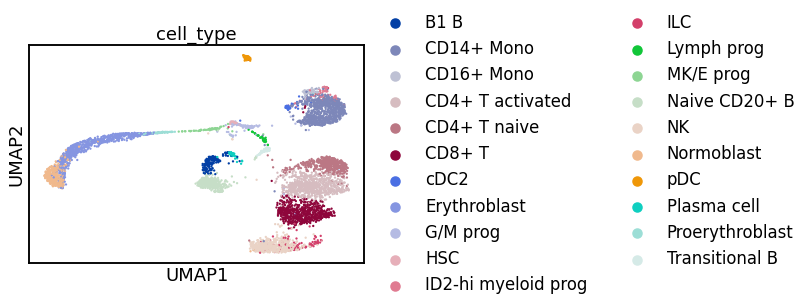

In [5]:
sc.pl.umap(adata, color = "cell_type")

# Run scvi on "corrected" ATAC with poisson loss

In [6]:
#import scvi

#adata = adata[adata.obs.batch == 's1d1'].copy()

adata.layers["counts"].max()

94.0

In [7]:
def compute_embedding(adata, X_emb):      
    adata.obsm['X_emb'] = X_emb
    
    if 'X_umap' in adata.obsm.keys():
        adata.obsm.pop('X_umap')
    if 'umap' in adata.obsm.keys():
        adata.obsm.pop('umap')  
    if 'neighbors' in adata.uns.keys():
        adata.uns.pop('neighbors')
    sc.pp.neighbors(adata, use_rep='X_emb')
    sc.tl.umap(adata)

# SCVI

In [5]:
scvi.model.SCVI.setup_anndata(adata, layer="counts")

In [6]:
model = scvi.model.SCVI(adata=adata, gene_likelihood="poisson", n_latent=18, n_hidden=341, use_layer_norm="both", use_batch_norm="none")

In [7]:
model.module

VAE(
  (z_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=116490, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): ReLU()
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=341, out_features=18, bias=True)
    (var_encoder): Linear(in_features=341, out_features=18, bias=True)
  )
  (l_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=116490, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): ReLU()
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=341, out_features=1, bias=True)
    (var_encoder): Linear(in_features=341, out_feat

In [8]:
model.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 10/400:   2%|▏         | 9/400 [00:24<16:43,  2.57s/it, loss=1.17e+04, v_num=1]

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
Exception in thread Thread-16:
Traceback (most recent call last):
  File "/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/torch/utils/data/_utils/pin_memory.py", line 28, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _Forki

In [8]:
#setup logger
logger = WandbLogger(project=f"poisson_atac")
logger.watch(model.module, log='all')

#train model
model.train(logger=logger, early_stopping=True, early_stopping_monitor="reconstruction_loss_validation")
wandb.finish()

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/notebook/utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)
wandb: Currently logged in as: lauradm (use `wandb login --relogin` to force relogin)
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:46: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML  # type: ignore


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 3/400:   0%|          | 2/400 [00:16<47:09,  7.11s/it, loss=1.23e+04, v_num=v214]  

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:897: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn('Detected KeyboardInterrupt, attempting graceful shutdown...')
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:46: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML  # type: ignore


/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:58: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [ ]:
pip install wandb

In [ ]:
X_emb = model.get_latent_representation(atac)

In [ ]:
compute_embedding(atac, X_emb)

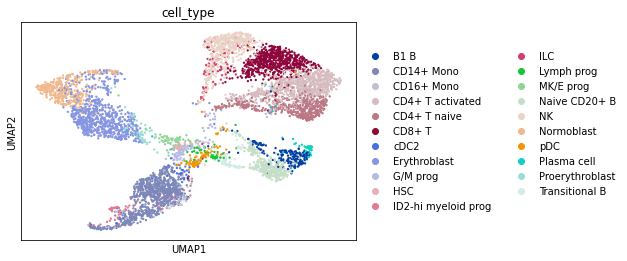

In [ ]:
sc.pl.umap(atac, color = ["cell_type"])

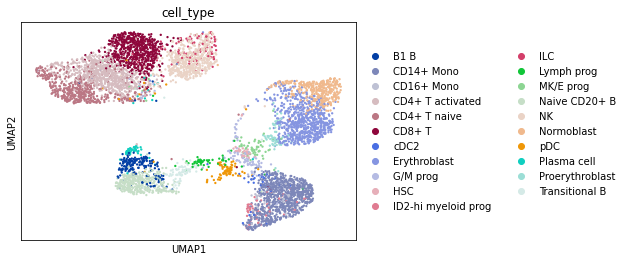

In [27]:
sc.pl.umap(atac, color = ["cell_type"])

In [43]:
model.save("/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/models/poisson_atac_scvi_halved")

# amtortized LDA

In [6]:
scvi.model.AmortizedLDA.setup_anndata(adata, layer="counts")

In [19]:
model = scvi.model.AmortizedLDA(adata, n_topics=130)

In [ ]:
logger = WandbLogger(project=f"poisson_atac")
logger.watch(model.module, log='all')
#train model
model.train(logger=logger,train_size=0.8, validation_size=0.1, early_stopping=False, max_epochs=500)
wandb.finish()

wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:46: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML  # type: ignore


wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 320/500:  64%|██████▍   | 319/500 [21:37<12:16,  4.07s/it, v_num=6c7h, elbo_train=1.89e+8]

In [ ]:
model.save("/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/models/amortizedLDA", overwrite=True)

In [7]:
model = scvi.model.AmortizedLDA.load("/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/models/amortizedLDA", adata=adata)

In [8]:
X_emb = model.get_latent_representation(adata)

In [10]:
compute_embedding(adata, X_emb)

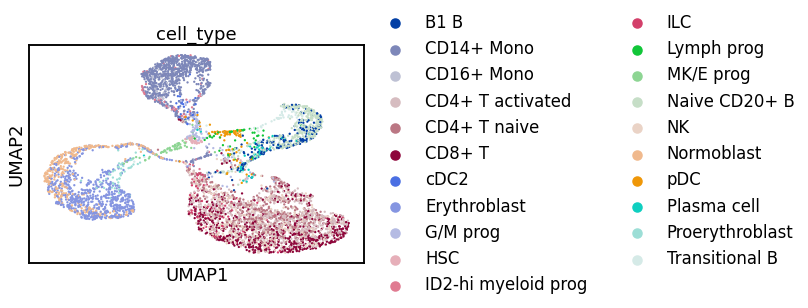

In [11]:
sc.pl.umap(adata, color = ["cell_type"])

# PEAKVI

In [54]:
atac = adata[adata.obs.batch == 's1d1'].copy()

In [55]:
atac.layers["counts"].data = np.ceil(atac.layers["counts"].data/2)

In [56]:
atac.layers["counts"].max()

94.0

In [57]:
scvi.model.PEAKVI.setup_anndata(atac)

/storage/groups/ml01/code/laura.martens/github_repos/scvi-tools/scvi/data/anndata/_utils.py:97: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(


In [60]:
model = scvi.model.PEAKVI(adata=atac)

In [62]:
#setup logger
logger = WandbLogger(project=f"poisson_atac")
logger.watch(model.module, log='all')

#train model
model.train(logger=logger,train_size=0.8, validation_size=0.1, early_stopping=True)
wandb.finish()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 122/500:  24%|██▍       | 122/500 [20:58<1:04:58, 10.31s/it, loss=1.55e+08, v_num=zrss]


In [63]:
X_emb = model.get_latent_representation(atac)

In [64]:
compute_embedding(atac, X_emb)

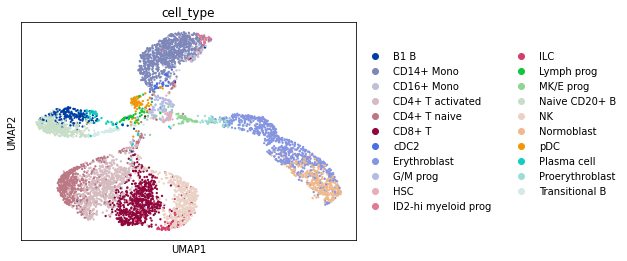

In [65]:
sc.pl.umap(atac, color = ["cell_type"])

# Own model

In [8]:
from poisson_atac.seml import evaluation_table, evaluate_embedding, evaluate_test_cells

In [20]:
#patac.model.GEXtoATAC.setup_anndata(adata, layer="counts", batch_key="batch", adata_gex_obsm_key="X_gex")
patac.model.BinaryGEXtoATAC.setup_anndata(adata, batch_key="batch", adata_gex_obsm_key="X_gex")
#patac.model.LinearCountPEAKVI.setup_anndata(adata, layer="counts", batch_key="batch")

INFO     Generating sequential column names                                                  


INFO:scvi.data.fields._obsm_field:Generating sequential column names


In [21]:
model = patac.model.BinaryGEXtoATAC(adata, n_latent=20)

In [22]:
#model = patac.model.PEAKVI(adata, n_latent=130)
#model = patac.model.GEXtoATAC(adata, n_layers_decoder=0, n_latent=136, use_layer_norm="encoder", n_hidden=150)
#model = patac.model.GEXtoATAC(adata, n_latent=136, use_layer_norm="encoder", n_hidden=150)
#model = patac.model.LinearCountPEAKVI(adata, n_latent=130, use_layer_norm="encoder")

In [23]:
model.module

BinaryGEXTOATACVAE(
  (z_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=13431, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
        (Layer 1): Sequential(
          (0): Linear(in_features=341, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=341, out_features=20, bias=True)
    (var_encoder): Linear(in_features=341, out_features=20, bias=True)
  )
  (z_decoder): Decoder(
    (px_decoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=20, out_f

In [24]:
model.train(train_size=0.8, validation_size=0.1, early_stopping=True, batch_size=128, max_epochs =500, lr = 5e-4)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 4/500:   1%|          | 3/500 [00:20<56:31,  6.82s/it, loss=1.77e+08, v_num=1]

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
Exception in thread Thread-14:
Traceback (most recent call last):
  File "/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/torch/utils/data/_utils/pin_memory.py", line 28, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/multiprocessing/queues.py", line 122, in get
    return _Forki

In [25]:
test = model.get_accessibility_estimates(indices=np.arange(10), normalize_cells=True, normalize_regions=True)

In [27]:
model.get_latent_representation(indices=np.arange(10))

array([[ 2.662592  ,  2.137075  ,  2.4727993 , -2.9900048 , -0.6970022 ,
        -0.05132892,  3.4875689 ,  3.649594  , -2.5698817 , -4.594844  ,
         3.9168048 ,  1.1267843 , -2.318712  ,  3.6121922 , -2.9992902 ,
         1.1524411 , -4.418719  ,  0.20994397, -3.4500859 ,  0.7448462 ],
       [ 2.8082945 ,  2.2983518 ,  2.355461  , -2.9728887 , -0.86509544,
         0.09358134,  3.4792335 ,  3.5193415 , -2.6769626 , -4.4737945 ,
         3.9628005 ,  1.0739751 , -2.3442504 ,  3.547642  , -2.991642  ,
         1.2929403 , -4.322475  ,  0.28405693, -3.4057572 ,  0.7409961 ],
       [ 2.644132  ,  2.096752  ,  2.500144  , -2.964283  , -0.6976279 ,
        -0.07984842,  3.471073  ,  3.7057998 , -2.5754142 , -4.5933137 ,
         3.8993528 ,  1.1221579 , -2.299721  ,  3.58767   , -3.0194256 ,
         1.1320764 , -4.4243016 ,  0.21578896, -3.4717484 ,  0.7385256 ],
       [ 2.6599238 ,  2.109208  ,  2.4823158 , -2.9675443 , -0.7249174 ,
        -0.07532363,  3.4882383 ,  3.7028403 , -

In [38]:
#setup logger
logger = WandbLogger(project=f"poisson_atac")
logger.watch(model.module, log='all')
#
#train model
model.train(logger=logger,train_size=0.8, validation_size=0.1, early_stopping=True, batch_size=128, max_epochs =500, lr = 5e-4)
wandb.finish()

wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:46: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML  # type: ignore


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 81/500:  16%|█▌        | 81/500 [10:27<54:03,  7.74s/it, loss=1.74e+08, v_num=hkju]  


/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:46: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML  # type: ignore


/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:58: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [39]:
X_emb = model.get_latent_representation()

In [40]:
compute_embedding(adata, X_emb)

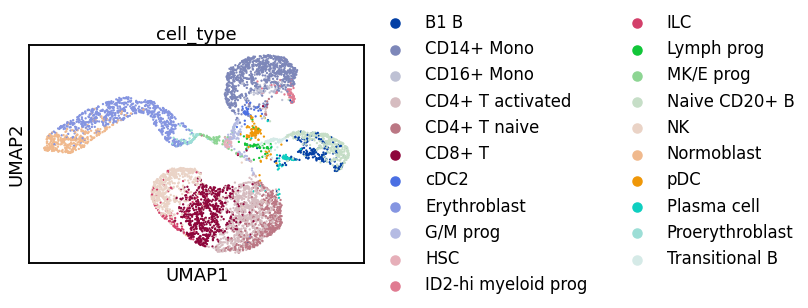

In [41]:
sc.pl.umap(adata, color = ["cell_type"])

In [42]:
evaluate_embedding(adata, X_emb, labels_key = "cell_type")

NMI...
ARI...


0
NMI_cluster/label          0.736945
ARI_cluster/label          0.577933
ASW_label                       NaN
ASW_label/batch                 NaN
PCR_batch                       NaN
cell_cycle_conservation         NaN
isolated_label_F1               NaN
isolated_label_silhouette       NaN
graph_conn                      NaN
kBET                            NaN
iLISI                           NaN
cLISI                           NaN
hvg_overlap                     NaN
trajectory                      NaN

In [43]:
5+6

11

In [17]:
model.save("/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/models/poisson_atac_count_gex")

In [23]:
evaluate_test_cells(model, adata)

Model
auroc                  0.900286
average_precision      0.283624
bce                10648.557829
rmse                   0.153431

In [45]:
evaluate_test_cells(model, adata)

Model
auroc                  0.899580
average_precision      0.283068
bce                10659.690391
rmse                   0.153462

# Check seml

In [5]:
patac.seml.experiment_runner_atac_to_atac.ExprimentWrapper()

AttributeError: module 'poisson_atac.seml' has no attribute 'experiment_runner_atac_to_atac'

In [12]:
patac.model.PEAKVI.setup_anndata(atac, layer="counts")

In [14]:
model =  patac.model.PEAKVI.load( "/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/models/poisson_atac_count", adata=atac)

In [32]:
X_emb = model.get_latent_representation(atac)

In [20]:
compute_embedding(adata, X_emb)

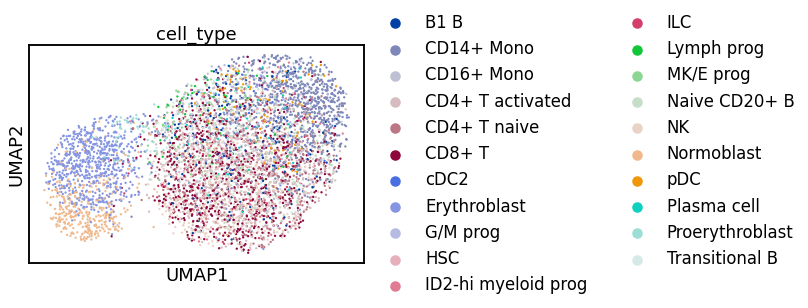

In [22]:
sc.pl.umap(adata, color = ["cell_type"])

In [22]:
model.module

CountVAE(
  (z_encoder): Encoder(
    (encoder): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=116490, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
        (Layer 1): Sequential(
          (0): Linear(in_features=341, out_features=341, bias=True)
          (1): None
          (2): LayerNorm((341,), eps=1e-05, elementwise_affine=False)
          (3): LeakyReLU(negative_slope=0.01)
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=341, out_features=130, bias=True)
    (var_encoder): Linear(in_features=341, out_features=130, bias=True)
  )
  (decoder): LinearDecoderSCVI(
    (factor_regressor): FCLayers(
      (fc_layers): Sequential(
        (Layer 0): Sequential(
          (0): Linear(in_features=13